# [EXAM NUMBER] - Intelligent Systems 3: Probabilistic and Deep Learning

## Setup
The notebook expects that the files have been uploaded to the session storage so that relative paths can be used. The `_MACOSX` folder should be deleted after extracting the images for question 3 and 4 as it will cause issues with using `ImageFolder` to load the dataset. The following is the expected structure.

```
├── images/
│   ├── class_0/
│   │   ├── 0000.tif
│   │   └── ...
│   ├── class_1/
│   │   ├── 0000.tif
│   │   └── ...
│   ├── class_2/
│   │   ├── 0000.tif
│   │   └── ...
│   ├── class_3/
│   │   ├── 0000.tif
│   │   └── ...
│   └── class_4/
│       ├── 0000.tif
│       └── ...
├── int3.ipynb
├── data.csv
├── unseendata.csv
├── classify_symbols.py
└── weights.pkl
```

### Question 1: Regression and classification (42 marks)
**a. Train and evaluate a least squares linear regression model predicting the value of
variable D from variables A, B and C.**

In [3]:
# All imports and setup for question 1
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, normalize
import pandas as pd
from copy import deepcopy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True)

In [4]:
DATA = np.genfromtxt('data.csv', delimiter=',', skip_header=1, dtype=float) # Imports the data for question 1 and 2

def split_data(data, train_size):
    '''Shuffles the data and then splits into training and test sets.'''

    # Shuffles the data but always in the same way to allow better comparisons of models
    np.random.seed(10)
    np.random.shuffle(data)

    # separates D as the target variable
    X, y = data[:,:-1], data[:,-1]

    # Splits the data into training and test sets
    X_train, X_test = X[:-train_size], X[-train_size:]
    y_train, y_test = y[:-train_size], y[-train_size:]
    return X_train, X_test, y_train, y_test, X, y

-------------------------------- QUESTION 1 (a) --------------------------------


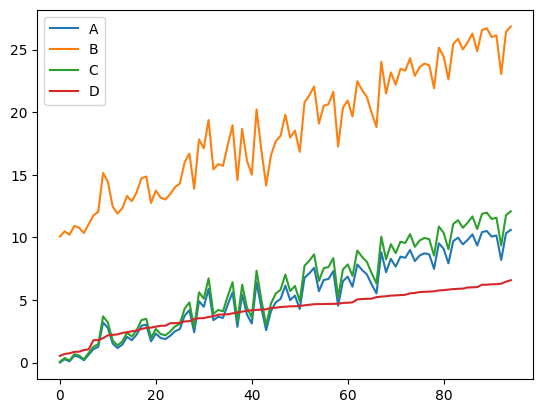

Coefficients of A, B & C: [-3.62624739e+12  8.71570713e+12 -8.97206622e+12]
Mean squared error: 0.33
Coefficient of determination (R2): 0.86

Cross-Validation Mean R2 Score: 0.87
----------------------------------------------------------------------------


In [5]:
def least_squares_regression(data, train_size, v=0, log=True, plot=True):
    """Runs linear least squares regression on the data. 
    Normalises and scales the data if specified.
    v=0 no preprocessing, v=1 normalise, v=2 scale, v=3 normalise and scale."""

    # Creates a copy of the data so the original data is not modified by the function
    data_copy = deepcopy(data)
    
    if v == 1 or v == 3:
            data_copy = normalize(data_copy, axis=0) # axis=0 normalises the data by feature

    if v == 2 or v == 3:
            data_copy = scale(data_copy)
    
    # Creates a graph of the (scaled) data if specified
    if plot:
        df = pd.DataFrame(data_copy, columns = ['A','B','C','D'])
        df.plot()
        plt.show()
    
    # Splits the data into training and test sets
    X_train, X_test, y_train, y_test, X, y = split_data(data_copy, train_size)

    # Train model and make predictions
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)

    # Test of generalisation (10-fold cross-validation)
    scores = cross_val_score(regr, X, y, cv=10)

    # Prints the results
    if log:
        print("Coefficients of A, B & C:", regr.coef_)
        print('Mean squared error: %.2f'
            % mean_squared_error(y_test, y_pred))
        print('Coefficient of determination (R2): %.2f'
            % r2_score(y_test, y_pred))
        print("\nCross-Validation Mean R2 Score: " + str(scores.mean().round(2)))

    return regr, scores.mean()

print("-" * 32 + " QUESTION 1 (a) " + "-" * 32)
least_squares_regression(data=DATA, train_size=75)
print("-" * 76)

**b. Repeat the above task after carrying out in turn data normalization, data scaling and
their combination, and evaluate the benefits of each of these 3 types of data preprocessing.**

_An assumption has been made that the normalization and scaling functions to be used should be the ones used in the week 5 hands on exercise "Centering, normalizing and scaling"._

Below shows the affect of data normalization, data scaling and the combination of the two before performing the previous linear regression. 

- [Normalisation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html): Scale input vectors individually to unit norm (vector length)
- [Scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale): Standardize a dataset along any axis. Center to the mean and component wise scale to unit variance.

As shown by the R2 values for the three types of data preprocessing (and mean r2 values when running cross validation), none have had a significant impact on the efficiency of the model. This is likely due to the fact that its not necessary to normalize or scale the data when using linear regression as the coefficients learned by the model are not affected by the scale of the input features. 

However, standardizing the data can be useful as it makes it easier to interpret the coefficients that the model has learned. For instance, if one features scale is much larger than another's, then the coefficient for that feature may also be larger even if it does not affect the predicted value as strongly. Standardizing prevents this as all features are on the same scale. For example, it has shown that A, B and C all affect the value for D equally. We can prove this by plotting the original data vs the scaled data which is shown below alongside the coefficients and R2 values. 

Additionally as shown, if you perform data normalization and then scaling, it has the same effect as scaling the data and gives no further advantages than interpreting coefficients. 

-------------------------------- QUESTION 1 (b) --------------------------------
Original Data:


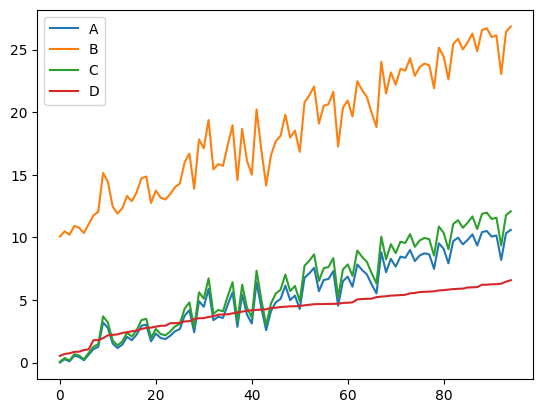

Data Normalisation:


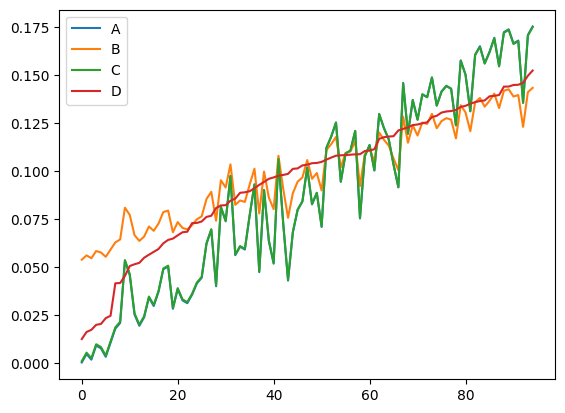

Coefficients of A, B & C: [-3.11051498e+13  1.46393674e+13  2.37649427e+13]
Mean squared error: 0.00
Coefficient of determination (R2): 0.88

Cross-Validation Mean R2 Score: 0.87
----------------------------------------------------------------------------
Data scaling


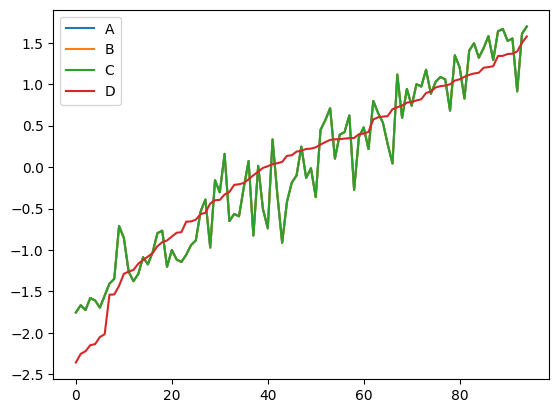

Coefficients of A, B & C: [0.33486256 0.33486256 0.33486256]
Mean squared error: 0.13
Coefficient of determination (R2): 0.88

Cross-Validation Mean R2 Score: 0.87
----------------------------------------------------------------------------
Norm then Scale


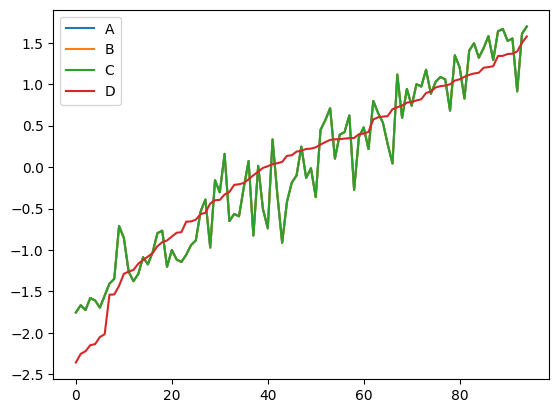

Coefficients of A, B & C: [0.33486256 0.33486256 0.33486256]
Mean squared error: 0.13
Coefficient of determination (R2): 0.88

Cross-Validation Mean R2 Score: 0.87
----------------------------------------------------------------------------


In [6]:
print("-" * 32 + " QUESTION 1 (b) " + "-" * 32)

print("Original Data:")
df = pd.DataFrame(DATA, columns = ['A','B','C', 'D'])
df.plot()
plt.show()


# 1. Performs Data Normalisation - using lecture example
print("Data Normalisation:")
least_squares_regression(data=DATA, train_size=75, v=1)
print("-" * 76)

# 2. Performs Data Scaling - using lecture example
print("Data scaling")
least_squares_regression(data=DATA, train_size=75, v=2)
print("-" * 76)

# 3. Performs Data Normalisation and Data Scaling - using lecture examples
print("Norm then Scale")
least_squares_regression(data=DATA, train_size=75, v=3)
print("-" * 76)

**c. Try to outperform the best result of the previous step by using regularisation (e.g. L1,
L2 or Elastic Net). Show how any parameter values are tuned and evaluate the benefits of
regularisation.**

The use of regularisation has been implemented by using RidgeCV regression. The data was first pre-processed by standardising it - removing the mean and scaling to unit variance. This is important as if features have different scales, then the penalty term will have a different effect on the coefficients of the features, depending on their scale. This can mean that the model may give more weight to features with larger scales, potentially ignoring smaller ones, unlike the previous linear regression.

The alpha value was determined by using cross-validation to determine the most successful value from the following list `[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]`. The value chosen was 0.1.

Comparing this to the previous regressions, this model has not performed any better, producing an identical R2 (and cross valided mean R2) value. As shown previously, we can see that the 3 features (A, B & C) are direct translations of each other. Its generally not a good idea to use highly correlated features in any type of regularized linear regression. The penalty term is not likely to be able to effectively determine any unimportant features as once scaled these features are identical (shown by the coefficients of A, B & C being identical). This therefore means that the addition of the penalty term had no additional benefit, and therefore has not been able to outperform the previous results.


In [7]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def regularisation(data, train_size, log=True):
    # Creates a copy of the data so the original data is not modified by the function
    data_copy = deepcopy(data)

    # Splits the data into training and test sets
    X_train, X_test, y_train, y_test, X, y = split_data(data_copy, train_size)

    # Train model and make predictions (scales the data first and performs cross validation to find the best alpha value)
    pipe = Pipeline([('Scaler', StandardScaler()), ('RidgeCV', RidgeCV(alphas=np.logspace(-6, 6, 13)))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Test of generalisation (10-fold cross-validation)
    scores = cross_val_score(pipe, X, y, cv=10)

    if log:
        print('Testing the following alpha values for regularisation: ', np.logspace(-6, 6, 13))
        print('Cross-validation got', pipe.named_steps['RidgeCV'].alpha_, 'for the complexity parameter')
        for i, name in enumerate(["A", "B", "C"]):
            print('Coefficient for {0} is {1}'.format(name,pipe.named_steps['RidgeCV'].coef_[i]))
        print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
        print('Coefficient of determination (R2): %.2f' % r2_score(y_test, y_pred))
        print("\nCross-Validation Mean R2 Score: " + str(scores.mean().round(2)))

    return pipe, scores.mean()

print("-" * 32 + " QUESTION 1 (c) " + "-" * 32)
regularisation(data=DATA, train_size=75)
print("-" * 76)

-------------------------------- QUESTION 1 (c) --------------------------------
Testing the following alpha values for regularisation:  [      0.000001       0.00001        0.0001         0.001
       0.01           0.1            1.            10.
     100.          1000.         10000.        100000.
 1000000.      ]
Cross-validation got 0.1 for the complexity parameter
Coefficient for A is 0.4549582578547384
Coefficient for B is 0.4549582578547342
Coefficient for C is 0.4549582578547271
Mean squared error: 0.30
Coefficient of determination (R2): 0.88

Cross-Validation Mean R2 Score: 0.87
----------------------------------------------------------------------------


**4. Add a set of suitable basis functions to the original data and train a linear regression
with an appropriate type of regularisation to find out which of the new basis functions bring
benefits. Explain briefly (in no more than 4 sentences) your reasoning.**

A set of basis functions has been added to the original data by using `PolynomialFeatures` with a degree of 3 to add all polynomial combinations of the features $<=$ to a degree of 3. After a process of trial and error 3 was selected as this produced the highest or equal r2 value. As previously mentioned, when scaled AB and C are all identical, making a lot of the basis functions added using PolynomialFeatures redundant ($A^2B$ is identical to $A^3$ etc.) and therefore only 3 coefficients have been identified from the model:

- Linear (A, B, C) = 0.35
- Squared (A^2, AB, etc.) = -0.0661
- Cubed (A^3, ABC, etc.)= 0.0137

The mean R2 score for this model is higher than the normal regularisation which suggests the small negative relationship for the squared functions and the small positive relationship of the cubed functions has slightly improved the predictions.

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(data, train_size, log=True):
    data = deepcopy(data)
    
    # splits the data into training and test sets
    X_train, X_test, y_train, y_test, X, y = split_data(data, train_size)

    pipe = Pipeline([('Scaler', StandardScaler()), ("BasisFunctions", PolynomialFeatures(3)), ("RidgeCV", RidgeCV(alphas=np.logspace(-6, 6, 13)))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Test of generalisation (10-fold cross-validation)
    scores = cross_val_score(pipe, X, y, cv=10)

    if log:
        print('Cross-validation got this value for the complexity parameter: ', pipe.named_steps['RidgeCV'].alpha_)
        for i, name in enumerate(["1 (bias)", "A", "B", "C", "A^2", "AB", "AC", "B^2", "BC", "C^2", "A^3", "(A^2)B", "(A^2)C", "A(B^2)", "ABC", "A(C^2)", "B^3", "(B^2)C", "B(C^2)", "C^3"]):
            print('Parameter for {0} is {1}'.format(name,pipe.named_steps['RidgeCV'].coef_[i].round(4)))
        print('\nMean squared error: %.2f' % mean_squared_error(y_test, y_pred))
        print('Coefficient of determination (R2): %.2f' % r2_score(y_test, y_pred))
        print("Cross-Validation Mean R2 Score: " + str(scores.mean().round(2)))

    return pipe, scores.mean()

print("-" * 32 + " QUESTION 1 (d) " + "-" * 32)
polynomial_regression(DATA, 75)
print("-" * 76)


-------------------------------- QUESTION 1 (d) --------------------------------
Cross-validation got this value for the complexity parameter:  1e-06
Parameter for 1 (bias) is 0.0
Parameter for A is 0.3474
Parameter for B is 0.3474
Parameter for C is 0.3474
Parameter for A^2 is -0.0662
Parameter for AB is -0.0662
Parameter for AC is -0.0662
Parameter for B^2 is -0.0662
Parameter for BC is -0.0662
Parameter for C^2 is -0.0662
Parameter for A^3 is 0.0137
Parameter for (A^2)B is 0.0137
Parameter for (A^2)C is 0.0137
Parameter for A(B^2) is 0.0137
Parameter for ABC is 0.0137
Parameter for A(C^2) is 0.0137
Parameter for B^3 is 0.0137
Parameter for (B^2)C is 0.0137
Parameter for B(C^2) is 0.0137
Parameter for C^3 is 0.0137

Mean squared error: 0.23
Coefficient of determination (R2): 0.90
Cross-Validation Mean R2 Score: 0.91
----------------------------------------------------------------------------


**5. Implement an appropriate automated procedure that will train all of the above models
and select the model expected to perform best on unseen data with the same distribution as your
training data. You need to include a code tile at the end of this section of your Jupyter notebook
that attempts to test your final choice of model on a data set stored in a file unseendata.csv
and compute $R^2$ for it. The file will have exactly the same format as file data.csv, including
the header, but possibly a different overall number of rows. This means you can use a renamed
copy of data.csv to debug that part of your code, and to produce the corresponding content
for your PDF file (in order to demonstrate that this part of the code is in working order).**

This function takes the data as input and trains all of the models using `data.csv` and calculates their mean 10 fold cross validation scores. The model with the highest cross validation score has been chosen to train against the `unseendata.csv`.

The model chosen was the `Linear regression with polynomial basis functions` with a mean R2 score of 0.91.

_The unseen code block will be shown as 0.21 mean squared error and 0.91 R2 value as it was tested using a renamed version of `data.csv`._


In [9]:
def choose_best_model(data, train_size):
    """Returns the model with the highest averaged cross-validation r2 score."""
    i, name, best_model, best_model_CV_mean = 1, None, None, None

    for v in range(0, 3):
        regr, cv_mean = least_squares_regression(data, train_size, v, log=False, plot=False)
        if v == 0:
                mod_name = "Linear Regression"
        elif v == 1:
            mod_name = "Linear Regression with Normalisation"
        elif v == 2:
            mod_name = "Linear Regression with Standardisation"
        elif v == 3: 
            mod_name = "Linear regression with Normalisation and Standardisation"
        if best_model_CV_mean is None or cv_mean > best_model_CV_mean:
            name, best_model, best_model_CV_mean = mod_name, regr, cv_mean
        print(f"{i}. {mod_name} has a mean r2 score of {cv_mean.round(2)}")
        i += 1
            
    regr, cv_mean = regularisation(data, train_size, log=False)
    mod_name = "Regularisation"
    if cv_mean > best_model_CV_mean:
        best_model, best_model_CV_mean = regr, cv_mean
        name = mod_name
    print(f"{4}. {mod_name} has a mean r2 score of {cv_mean.round(2)}")
    
    regr, cv_mean = polynomial_regression(data, train_size, log=False)
    mod_name = "Linear regression with polynomial basis functions"
    if cv_mean > best_model_CV_mean:
        best_model, best_model_CV_mean = regr, cv_mean
        name = mod_name
    print(f"{5}. {mod_name} has a mean r2 score of {cv_mean.round(2)}")
    
    print("\nThe best model to perform on unseen data is " + name + " as it has the highest mean r2 score of " + str(best_model_CV_mean.round(2)) + " after running 10-fold cross validation\n")
    
    return best_model

def test_unseen(best_model):
    """Runs the best model on the unseen data. Prints the mean squared error and R2 score."""
    # Loads unseen data and splits into input and output values
    unseen_data = np.genfromtxt('unseendata.csv', delimiter=',', skip_header=1, dtype=float)
    X, y = unseen_data[:,:-1], unseen_data[:,-1]

    # Predicts the output values
    y_pred = best_model.predict(X)
    
    print("Running on unseendata.csv...")
    print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
    print('Coefficient of determination (R2): %.2f' % r2_score(y, y_pred))

print("-" * 32 + " QUESTION 1 (e) " + "-" * 32)
best_model = choose_best_model(DATA, 75)
test_unseen(best_model)
print("-" * 76)

-------------------------------- QUESTION 1 (e) --------------------------------
1. Linear Regression has a mean r2 score of 0.87
2. Linear Regression with Normalisation has a mean r2 score of 0.87
3. Linear Regression with Standardisation has a mean r2 score of 0.87
4. Regularisation has a mean r2 score of 0.87
5. Linear regression with polynomial basis functions has a mean r2 score of 0.91

The best model to perform on unseen data is Linear regression with polynomial basis functions as it has the highest mean r2 score of 0.91 after running 10-fold cross validation

Running on unseendata.csv...
Mean squared error: 0.21
Coefficient of determination (R2): 0.91
----------------------------------------------------------------------------


6. Starting with the data in data.csv, find the median value of variable D. Replace all
values up to and including the median value with 0, and all values greater than that with 1. Treat
the resulting values of D as class labels to train and evaluate a classifier based on logistic
regression that takes variables A, B and C as input.

In [10]:
def logistic_regression(data, train_size):
    '''Replaces the last column with 1 if the value is greater than the median, 0 otherwise. 
    Trains a classifier using logistic regression using D as the class label.'''

    # Replaces the last column with 1 if the value is greater than the median, 0 otherwise.
    median = np.median(data[:, 3])
    data[:, 3] = np.where(data[:, 3] > median, 1, 0)

    # Splits the data into training and test sets
    X_train, X_test, y_train, y_test, X, y = split_data(data, train_size)

    # Runs logistic regression
    logisticRegr = LogisticRegression()
    logisticRegr.fit(X_train, y_train)

    predictions = logisticRegr.predict(X_test)
    probability_predictions = logisticRegr.predict_proba(X_test)

    # Shows first 5 predictions as an example
    print("First 5 example predictions:")
    for i in range(5):
        print("Predicted class:", predictions[i], "(Probability:" + str(probability_predictions[i][int(predictions[i])].round(4)) + ")")

     # Use score method to get out of sample accuracy of the model (2 decimal places)
    score = logisticRegr.score(X_test, y_test)
    print("\nOut of sample accuracy = " + str(score.round(2)*100) + "%")

    # Test of generalisation (10-fold cross-validation)
    scores = cross_val_score(logisticRegr, X, y, cv=10)

    print("\nCross-Validation Mean Out of Sample Accuracy: " + str(scores.mean().round(2)*100) + "%")

print("-" * 32 + " QUESTION f (d) " + "-" * 32)
logistic_regression(DATA, 75)
print("-" * 76)

-------------------------------- QUESTION f (d) --------------------------------
First 5 example predictions:
Predicted class: 1.0 (Probability:0.9586)
Predicted class: 0.0 (Probability:0.9835)
Predicted class: 0.0 (Probability:0.997)
Predicted class: 0.0 (Probability:0.857)
Predicted class: 1.0 (Probability:0.596)

Out of sample accuracy = 93.0%

Cross-Validation Mean Out of Sample Accuracy: 92.0%
----------------------------------------------------------------------------


# Question 2: Principal Component Analysis (8 marks)
**Starting with the same data.csv file from Q1, extend the table with 6 additional columns
consisting of the product of each pair of the original 4 variables A, B, C and D.
Apply principal component analysis (PCA) with a number of principal components (PCs) equal to
the number of original variables, i.e. p = 4. Label the resulting principal components in
decreasing order of variance as PC1. . .PC4 and list the linear equations showing how each of
them is calculated from the 10 input variables. Describe which variables affect most strongly
each of the 4 principal components, highlighting any notable findings and providing plausible
explanations for them.**

PCA is affected by scale, therefore the data has been scaled using the standard scaler from sklearn. Similar to previous questions, the variables A, B and C may as well be equal once they are scaled. Therefore all coefficients relating to these three are similar.

- PC1 - This component is most strongly affected by the products of D and the three other variables (AD, BD, CD) with a coefficient of 0.42. This suggests that as any of these variables increase so do the others. The products of A, B and C (AB, BC, AC) also have a coefficient of 0.35 which again suggests that as each of them increases so do the others. This is expected as we have already noted that A, B and C are all translations of the same data in the y direction. This does however note that D causes a slightly higher increase. This is a significant component and accounts for 59% of the variance.

- PC2 - This component is most strongly affected by the basic variables A, B, C with identical coefficients of 0.48. D also has a coefficient of 0.43. This suggests that as A B and C increase, D also increases but slightly less. This is a significant component and accounts for 39% of the variance.

- PC3 - This component is most strongly affected positively by variable D with a coefficient of 0.35, as well as all of the product variables of AB or C with a coefficient 0.4. Any product with D also significantly affects it negatively (-0.33). However the variance represented by this is only 1.5%.

- PC4 - This component is most strongly affected positively by variable D with a coefficient of 0.8. However, this only represents 0.4% of the variance.


In [11]:
from sklearn.decomposition import PCA
from itertools import combinations

data = np.loadtxt('data.csv',delimiter=',',skiprows=1)
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

# extend the table with 6 additional column consisting of the product of each pair of the original 4 variables A, B, C and D
# A, B, C, D, AB, AC, AD, BC, BD, CD

for i, j in combinations(range(4), 2):
    scaled_data = np.hstack((scaled_data, np.atleast_2d(np.multiply(scaled_data[:, i], scaled_data[:, j])).T))


pca = PCA(n_components=4)
pca.fit(scaled_data)
newData = pca.fit_transform(scaled_data)


cols = ["A", "B", "C", "D", "AB", "AC", "AD", "BC", "BD", "CD"]
explained_variance = pca.explained_variance_ratio_
principal_components = pca.components_

NewTotVar = 0
for i, dim in enumerate(('PC1','PC2','PC3','PC4')):
  print('Sample variance for the {0} dimension'.format(dim))
  print('var = {0}'.format(explained_variance[i]))
  print('Linear Equation for the {0} dimension'.format(dim))
  linear_eq = "+".join(["(" + "{:.2f}".format(coeff) + "*" + col + ")" for coeff, col in zip(principal_components[i], cols)])
  print(linear_eq)
  print("\n")


Sample variance for the PC1 dimension
var = 0.5931250017147633
Linear Equation for the PC1 dimension
(-0.15*A)+(-0.15*B)+(-0.15*C)+(-0.22*D)+(0.35*AB)+(0.35*AC)+(0.42*AD)+(0.35*BC)+(0.42*BD)+(0.42*CD)


Sample variance for the PC2 dimension
var = 0.3880987110545241
Linear Equation for the PC2 dimension
(0.48*A)+(0.48*B)+(0.48*C)+(0.43*D)+(0.17*AB)+(0.17*AC)+(0.11*AD)+(0.17*BC)+(0.11*BD)+(0.11*CD)


Sample variance for the PC3 dimension
var = 0.014611021191387269
Linear Equation for the PC3 dimension
(-0.17*A)+(-0.17*B)+(-0.17*C)+(0.35*D)+(0.40*AB)+(0.40*AC)+(-0.33*AD)+(0.40*BC)+(-0.33*BD)+(-0.33*CD)


Sample variance for the PC4 dimension
var = 0.004165266039325376
Linear Equation for the PC4 dimension
(-0.23*A)+(-0.23*B)+(-0.23*C)+(0.80*D)+(-0.17*AB)+(-0.17*AC)+(0.20*AD)+(-0.17*BC)+(0.20*BD)+(0.20*CD)




# Question 3

In [12]:
# Imports any modules needed for question 3

import torch
import os
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import datasets, transforms
import torch.nn as nn
import math
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
from torch.utils.data.sampler import WeightedRandomSampler
from torch.optim import SGD
from time import time
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64

## Splitting into test/train datasets
The model initially loads all of the images into the dataset using the `ImageFolder` class. It performs the simple operation of converting the images to grayscale to ensure that the number of channels for the images is 1 and then transforms them to pytorch tensors. 

As the dataset is unbalanced it needs to be split carefully to ensure that an equal proportion is in the test and train set. The following method was used to ensure this occurs. 

- Get the indices of every sample in the dataset
- Performs a [stratified test/train split using sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) on the indices, stratifying on the class labels - 80:20 train/test split was used as this is a common best practice.
- Uses the split indices to create pytorch `Subsets` of the original data.

A bar chart showing the number of samples per subset is shown below.

Total data set:  16828
Class 0 has 6000 samples - 35.65%
Class 1 has 181 samples - 1.08%
Class 2 has 606 samples - 3.60%
Class 3 has 3685 samples - 21.90%
Class 4 has 6356 samples - 37.77%


Train set:  13462
Class 0 has 4800 samples - 35.66%
Class 1 has 145 samples - 1.08%
Class 2 has 485 samples - 3.60%
Class 3 has 2948 samples - 21.90%
Class 4 has 5084 samples - 37.77%


Test set:  3366
Class 0 has 1200 samples - 35.65%
Class 1 has 36 samples - 1.07%
Class 2 has 121 samples - 3.59%
Class 3 has 737 samples - 21.90%
Class 4 has 1272 samples - 37.79%




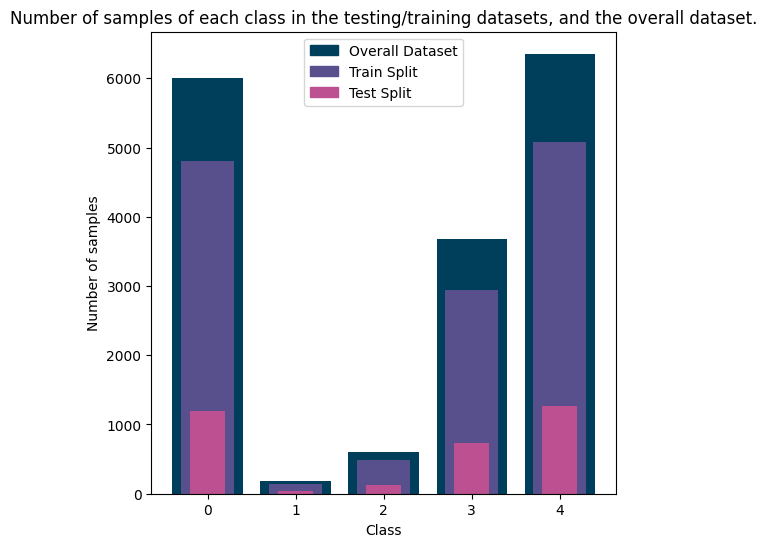

In [13]:
def print_split_stats(counts):
    ''' Simple helper method to print the number of samples per class in each subset of the data.'''
    total = sum(counts.values())
    for k, v in sorted(counts.items()):
        print(f"Class {k} has {v} samples - {v/total*100:.2f}%")
    print("\n")

# Initialises 
figure = plt.figure(figsize=(6, 6))
plt.title("Number of samples of each class in the testing/training datasets, and the overall dataset.")
plt.xlabel("Class")
plt.ylabel("Number of samples")

# Loads the entire dataset, transforming images to grayscale and into pytorch tensors.
data = datasets.ImageFolder(root='images', transform=transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor()]))
total_num_classes = Counter(data.targets)
print("Total data set: ", sum(total_num_classes.values()))
print_split_stats(total_num_classes)
plt.bar(total_num_classes.keys(), total_num_classes.values(), color='#003f5c')

# Splits the data proportionally by 
indices = list(range(len(data)))
train_indices, test_indices = train_test_split(indices, test_size=0.2, stratify=data.targets)

train_dataset = Subset(data, train_indices)
num_class_train = Counter(data.targets[i] for i in train_indices)
print("Train set: ", sum(num_class_train.values()))
print_split_stats(num_class_train)
plt.bar(num_class_train.keys(), num_class_train.values(), width=0.6, color='#58508d')

test_dataset = Subset(data, test_indices)
num_class_test = Counter(data.targets[i] for i in test_indices)
print("Test set: ", sum(num_class_test.values()))
print_split_stats(num_class_test)
plt.bar(num_class_test.keys(), num_class_test.values(), width=0.4, color='#bc5090')

overall_patch = mpatches.Patch(color='#003f5c', label='Overall Dataset')
train_patch = mpatches.Patch(color='#58508d', label='Train Split')
test_patch = mpatches.Patch(color='#bc5090', label='Test Split')

plt.legend(handles=[overall_patch, train_patch, test_patch]);

## Loading the Batches
The unbalanced dataset is also a problem when loading in each batch. Classes 1 and 2 have significantly less samples than the other classes in the dataset. This is important to mitigate as we don't want a training batch to contain samples just from 0, 3 and 4 and it instead should represent a good spread of the data.

This has been achieved by using a `WeightedRandomSampler` in pytorch when defining the `DataLoaders`. The weights for each class label are inversely proportional to the number of samples for each class. This is then used within the training dataloader (not necessary for the test loader). The code for this is shown directly below.


In [14]:
y_train = [data.targets[i] for i in train_indices] # list of labels for the training set
class_sample_count = np.array([v for _, v in sorted(num_class_train.items())]) # number of samples per class in the training set
weight = 1. / torch.tensor(class_sample_count).float() # inverse proportion of the number of samples per class in the training set
samples_weight = torch.from_numpy(np.array([weight[t] for t in y_train])) # sets the weight of each sample in the training set
sampler = WeightedRandomSampler(samples_weight, len(samples_weight)) # Defines the sampler using the calculated weights

# Creates the dataloaders for the training and testing sets - uses the weighted sampler for the training set
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

The following shows an example of a batch produced by the training data loader to prove the batches are now a better spread of the data. Along with the number of samples of each class in 5 batches.

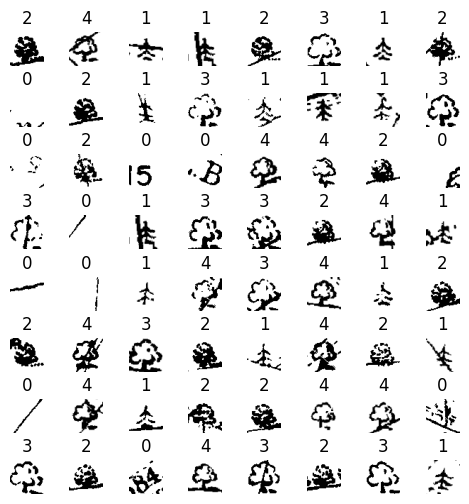

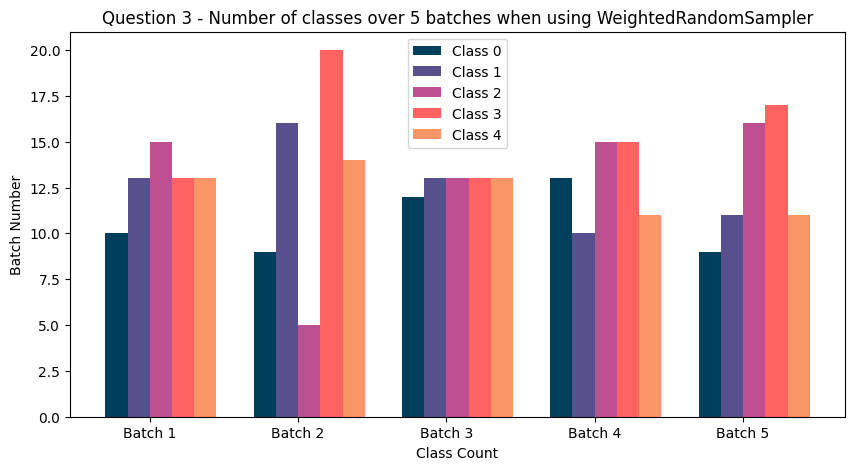

In [15]:
# Prints first batch of data
images, labels = next(iter(train_dataloader))
figure = plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.8)
cols, rows = 8, 8
for i in range(cols * rows):
    figure.add_subplot(rows, cols, i+1)
    plt.title(labels[i].item())
    plt.axis("off")
    plt.imshow(images[i,:].squeeze(), cmap="gray")
plt.show()

# Creates a barchart showing the number of samples per class in each batch
plt.figure(figsize=(10,5))

labels = ["Batch " + str(i) for i in range(1, 6)]
counts = [[] for i in range(5)]
for i in range(5):
    images, lab = next(iter(train_dataloader))
    for k, v in Counter(lab.numpy()).items():
        counts[k].append(v)

colours = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#FA9566"]
n = 5
ind = np.arange(n) # Position of bars on x-axis
width = 0.15 # Width of a bar 

# Plotting
for i in range(5):
    plt.bar(ind + (width*i), counts[i] , width, label=labels[i], color=colours[i])

plt.xlabel('Class Count')
plt.ylabel('Batch Number')
plt.title('Question 3 - Number of classes over 5 batches when using WeightedRandomSampler')
plt.xticks(ind + ((width*3) / 2), labels)
plt.legend(loc='best', labels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
plt.show()

## Network Structure
The network that has been chosen for the classifier is a version of a Convolutional Neural Network. These convolution layers are useful as they can help to extract features from the images that may be useful when classifying them, such as edges/textures. A CNN also allows for parameter sharing which means it should be more efficient when training and less prone to over fitting.  

- 2 Convolution layers were used with kernel sizes of 3. The smaller layer size was used as it is often a popular choice for many reasons. Without an odd filter size there can be distortions across layers and bigger kernel sizes are much less cost efficient.. 
- After each convolution layer there are also BatchNorm layers. These have been added to reduce the internal covariate shift which should allow for more stable training and allow for the use of higher learning rates.
- The reLU activation function has been used as it is relatively computationally efficient and simple. 
- MaxPooling has been used to reduce the number of parameters and therefore computation required in the network. Leaving the most prominent features from the previous convolution. 
- Finally a dropout of 0.2 has been included to help try and prevent over fitting which is more likely to occur due to the fewer number of unique samples for some of the classes. 

There are then 2 fully connected layers in the Multilayer perceptron ending in a logSoftmax to convert the output to a probability distribution.

In [16]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.ConvolutionalLayers = nn.Sequential(
            
        # First convolutional layer
        nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, stride=1, padding=1), # output size = B × 12 × 48 x 48
        nn.BatchNorm2d(12),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), # output size = B × 12 × 24 x 24
        nn.Dropout(0.2),

        # Second Convolutional layer
        nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1), # output size = B × 24 × 24 x 24
        nn.BatchNorm2d(24),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2, 2), stride=2), # output size = B × 24 × 12 x 12
        nn.Dropout(0.2),
        )

        self.MLP = nn.Sequential(
		nn.Linear(in_features=12*12*24, out_features=300),
        nn.BatchNorm1d(300),
		nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(in_features=300, out_features=180),
        nn.BatchNorm1d(180),
        nn.ReLU(),
        nn.Dropout(0.2),

		nn.Linear(in_features=180, out_features=5),
		nn.LogSoftmax(dim=1) # probability distribution
        )
    
    def forward(self, x):
        # Input x has dimensions 64 x 1 x 48 x 48
        x = self.ConvolutionalLayers(x)
        x = x.view(x.size(0), -1)
        x = self.MLP(x) # 64 x 5
        return x

Negative log likelihood has been chosen for the loss function for the network. This does the same thing as CrossEntropyLoss however I have included the LogSoftMax within the network structure to convert the output into a probability distribution of the 5 classes. Either of these methods are the standard in multi-class classification problems.

The optimiser chosen was the Stochastic Gradient Descent optimiser. This is a simple algorithm that may converge more slowly than Adam but is argued to generalise better. 
    - [_(Hardt, M., Recht, B., & Singer, Y. (2016, June). Train faster, generalize better: Stability of stochastic gradient descent. In International Conference on Machine Learning (pp. 1225–1234). PMLR.)_](https://proceedings.mlr.press/v48/hardt16.html)

The learning rate of 0.01 was chosen by starting with a relatively high value and gradually decreasing it whereas the momentum (0.9) started at a lower value and was increased until performance improved. 

In [17]:
model = NeuralNetwork().to(device)
loss_func = nn.NLLLoss()

optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
time0 = time()
epochs = 10

for e in range(epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        loss = loss_func(output, labels)
    
        optimizer.zero_grad() # training
        loss.backward() # learns by backprop
        optimizer.step() # optimises weights
        
        if (i+1) % 70 == 0:
            print('Epoch [{}/{}], Iteration [{}/{}], Loss: {:.4f}'.format(e + 1, epochs, i + 1, len(train_dataloader), loss.item()))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch [1/10], Iteration [70/211], Loss: 0.0330
Epoch [1/10], Iteration [140/211], Loss: 0.0049
Epoch [1/10], Iteration [210/211], Loss: 0.0312
Epoch [2/10], Iteration [70/211], Loss: 0.0073
Epoch [2/10], Iteration [140/211], Loss: 0.0042
Epoch [2/10], Iteration [210/211], Loss: 0.0085
Epoch [3/10], Iteration [70/211], Loss: 0.0014
Epoch [3/10], Iteration [140/211], Loss: 0.0014
Epoch [3/10], Iteration [210/211], Loss: 0.0037
Epoch [4/10], Iteration [70/211], Loss: 0.0008
Epoch [4/10], Iteration [140/211], Loss: 0.0018
Epoch [4/10], Iteration [210/211], Loss: 0.0014
Epoch [5/10], Iteration [70/211], Loss: 0.0025
Epoch [5/10], Iteration [140/211], Loss: 0.0016
Epoch [5/10], Iteration [210/211], Loss: 0.0024
Epoch [6/10], Iteration [70/211], Loss: 0.0023
Epoch [6/10], Iteration [140/211], Loss: 0.0009
Epoch [6/10], Iteration [210/211], Loss: 0.0022
Epoch [7/10], Iteration [70/211], Loss: 0.0005
Epoch [7/10], Iteration [140/211], Loss: 0.0004
Epoch [7/10], Iteration [210/211], Loss: 0.0014

In [18]:
# Used to save the weights of the model into a file
torch.save(model.state_dict(), 'weights.pkl')

## Classification Accuracy
Overall the model has an accuracy of 99.85% on the test set after making 3,361 correct predictions out of a total 3,366 guesses. The accuracy checking code is shown below along with an example of the images with their real and predicted labels.

3362 / 3366 predictions correct with 99.88% accuracy


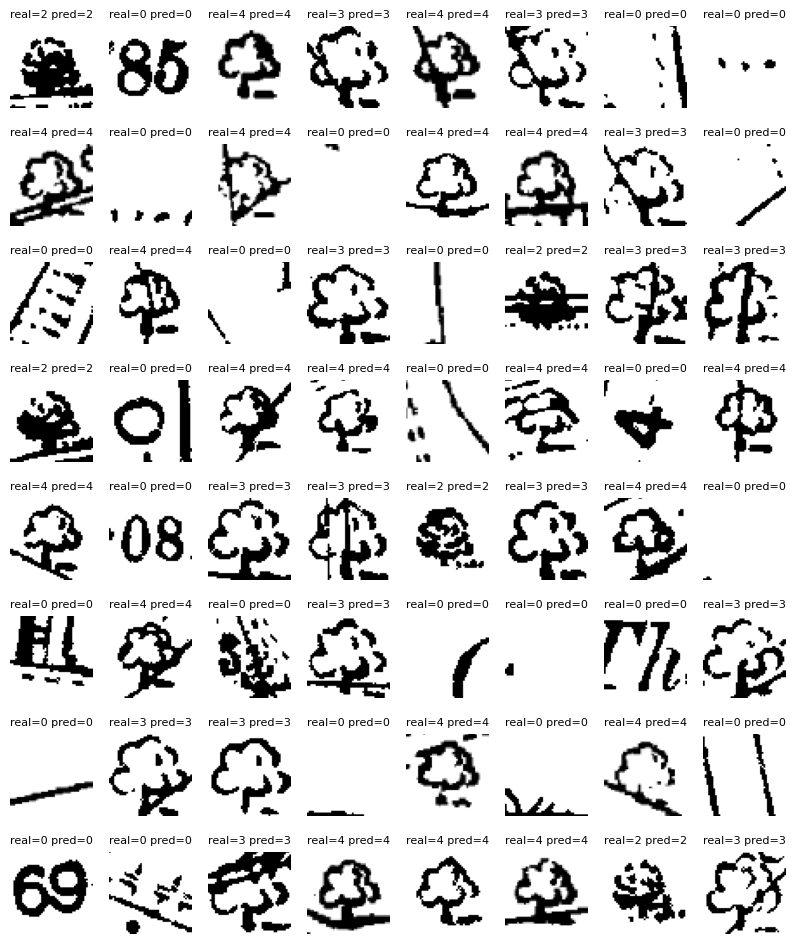

In [19]:
def check_accuracy(loader, model):
    '''Uses the test dataset to check how many images the model correctly classifies'''
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        print(f'{num_correct} / {num_samples} predictions correct with {float(num_correct)/float(num_samples)*100:.2f}% accuracy')

check_accuracy(test_dataloader, model)

# Run a test batch through the network
images, labels = next(iter(test_dataloader))
images, labels = images.to(device), labels.to(device)
output = model(images)
pred_y = torch.argmax(output, 1)

# Display first 25 images with predicted labels
figure = plt.figure(figsize=(10, 12))
for i in range(64):
    figure.add_subplot(8, 8, i+1)
    plt.title("real={} pred={}".format(labels[i], pred_y[i]), fontsize=8)
    plt.axis("off")
    plt.imshow(images[i,:].squeeze().cpu(), cmap="gray")
plt.show()

## Classify Symbols Script

In [21]:
import classify_symbols

image_tensors = []
transform = transforms.Compose(
    [transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])

for i in [0, 1, 2, 3, 4]:
    img = Image.open("images/class_" + str(i) + "/0000.tif")
    img = transform(img)
    img = torch.unsqueeze(img, 0)
    image_tensors.append(img)

images = torch.cat(image_tensors)

output = classify_symbols.classify(images)
print(output)

tensor([0, 1, 2, 3, 4])


# Question 4

In [ ]:
# setup for question 4
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
import torchvision.transforms as transforms
import numpy as np
from torchvision import datasets, transforms
from collections import Counter
from torch.utils.data.sampler import WeightedRandomSampler
import matplotlib.pyplot as plt
from PIL import Image

BATCH_SIZE = 64

%matplotlib inline
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# sets seed for reproducibility
torch.manual_seed(200)
torch.cuda.manual_seed(200)
np.random.seed(200)

## Loading the Data
As only classes 1-4 are used for generating the tree images, a custom dataset was defined to load in only these folders as `ImageFolder` which was used before has no parameters to ignore certain folders. 

CGANs usually train better when normalised, so an additional transformation was included to scale the images between -1 and 1.

A `WeightedRandomSampler` was implemented in the same way as it previously was to make up for class imbalance. The stratified split for training/test sets is not needed as the entire dataset is used to train the CGAN. 


In [ ]:
class CGANImageDataset(Dataset):
    def __init__(self, root, image_dirs, transform=None):
        self.root = root
        self.transform = transform
        self.all_images = []
        self.labels = []
        i = 0
        for dir in image_dirs:
            dir_path = root + "/" + image_dirs[i]
            self.all_images += [img for img in os.listdir(dir_path) if img.endswith(".tif")]
            self.labels += [i for img in os.listdir(dir_path) if img.endswith(".tif")]
            i+=1

    def __len__(self):
        return len(self.all_img)

    def __getitem__(self, idx):
        label = self.labels[idx] 
        image = Image.open(self.root + "/class_" + str(label+1) + "/" + self.all_images[idx])

        if self.transform:
            image = self.transform(image)

        return image, label

CGAN_data = CGANImageDataset('images', ["class_1", "class_2", "class_3", "class_4"], transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor(), 
                                                                                transforms.Normalize(0.5,0.5)]))                                                      

cgan_y_train = CGAN_data.labels
num_class_gan_train = Counter(cgan_y_train)
cgan_class_sample_count = np.array([v for _, v in sorted(num_class_gan_train.items())])
cgan_weight = 1. / torch.tensor(cgan_class_sample_count).float()
cgan_samples_weight = np.array([cgan_weight[t] for t in cgan_y_train])
cgan_samples_weight = torch.from_numpy(cgan_samples_weight)
sampler = torch.utils.data.WeightedRandomSampler(cgan_samples_weight, len(cgan_samples_weight))
CGAN_dataloader=torch.utils.data.DataLoader(CGAN_data, batch_size=BATCH_SIZE, sampler = sampler, drop_last=True)

images, labels = next(iter(CGAN_dataloader))
figure = plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.8)
cols, rows = 5, 5
for i in range(cols * rows):
    figure.add_subplot(rows, cols, i+1)
    plt.title(labels[i].item())
    plt.axis("off")
    plt.imshow(images[i,:].squeeze(), cmap="gray")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))

labels = ["Batch " + str(i) for i in range(1, 6)]
counts = [[] for i in range(4)]
for i in range(5):
    images, lab = next(iter(CGAN_dataloader))
    for k, v in Counter(lab.numpy()).items():
        counts[k-1].append(v)

colours = ["#003f5c", "#58508d", "#bc5090", "#ff6361"]
n = 5
ind = np.arange(n) # Position of bars on x-axis
width = 0.15  # Width of a bar 

for i in range(4):
    plt.bar(ind + (width*i), counts[i] , width, label=labels[i], color=colours[i])

plt.xlabel('Class Counts')
plt.ylabel('Batch Number')
plt.title('Number of classes over 5 batches when using WeightedRandomSampler')

plt.xticks(ind + ((width*3) / 2), labels)
plt.legend(loc='best', labels=["Class 1", "Class 2", "Class 3", "Class 4"])
plt.show()

## Architecture
Originally an architecture using convolution layers similar to DCGAN model was used. However, this only generated trees of one type which were all identical, and passing the label seemed to have no effect, even after altering the hyperparameters of the model.

Therefore the simpler architecture shown below was designed as a test and produced better results. However, while it is able to generate an image of each of the 4 trees, it still suffers from severe mode collapse. 

An embedding layer has been used to turn the class label of 0, 1, 2 or 3 into a feature vector with a dimensionality of 40. This is then concatenated with the latent vector of size 100 and fed into the generator model. 

Unfortunately CGANs are difficult to train as both the generator model and the discriminator model are trained simultaneously in a zero sum game. This means that improvements to one model come at the expense of the other model. This has occured with the provided model and training is significantly unstable. After using a seed to allow the model to be reproducible, it was shown that at epoch 10 the model has learned about the 4 different labels but suffers from severe mode collapse, with the only differences being with the shading of some of the trees. 

LeakyReLU activation function has been used in both the generator and discriminator to help prevent a vanishing gradient.

### Generator
- Tanh has been used at the end of the generator model as the images are normalised between -1 and 1
- Otherwise each layer is a fully connected linear layer

### Discriminator
- Utilises dropout to prevent over-fitting
- Final sigmoid activation function as it is a binary classification

The hyperparameters were again chosen by performing trial and error, and adjusting them based on the output of the model.

In [ ]:
z_latent = 100 # Size of z latent vector (i.e. size of generator input)
emb_num = 40
num_epochs = 10 # Number of training epochs
lr = 0.0001 # Learning rate for optimizers
beta1 = 0.5 # Beta1 hyperparam for Adam optimizers
dr = 0.3

In [ ]:
class ConditionalGenerator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.embedded_label = nn.Embedding(4,emb_num)
        
        self.model = nn.Sequential(
            nn.Linear(z_latent + emb_num, 256), # x = torch.cat([z,c], axis=1) ## z.shape == (64,100), c.shape == (64,10), torch.cat([z,c], axis=1).shape == (64,110)
            nn.LeakyReLU(),
            
            nn.Linear(256, 768),
            nn.LeakyReLU(),
            
            nn.Linear(768, 1024),
            nn.LeakyReLU(),

            nn.Linear(1024, 2304),
            nn.Tanh() # as normalised between -1 and 1
        )
        
    def forward(self, z, labels):
        z = z.view(z.size(0), z_latent)
        c = self.embedded_label(labels)
        x = torch.cat([z,c], axis=1)
        output = self.model(x)
        return output.view(x.size(0), 48, 48)

In [ ]:
class ConditionalDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.embedded_label = nn.Embedding(4,emb_num)
        
        self.model = nn.Sequential(
            nn.Linear(2304 + emb_num, 1024), # x = torch.cat([x,c], axis=1) ## x.shape == (64,784), c.shape == (64,10), torch.cat([x,c],axis=1).shape == (64,794)
            nn.LeakyReLU(),
            nn.Dropout(dr),
            
            nn.Linear(1024, 512),
            nn.LeakyReLU(),
            nn.Dropout(dr),
            
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(dr),
            
            nn.Linear(256, 1),
            nn.Sigmoid() # binary classification problem of real or fake
        )
    
    def forward(self, x, labels):
        c = self.embedded_label(labels)
        x = x.view(x.size(0), 2304)
        x = torch.cat([x,c], axis=1)
        output = self.model(x)
        return output.squeeze()

cond_gen = ConditionalGenerator().to(device)
cond_discrim = ConditionalDiscriminator().to(device)

In [ ]:
from torch.autograd import Variable
from torchvision.utils import make_grid

# Initialize BCELoss function
criterion = nn.BCELoss()

# Adam optimizers for generator and discriminator
d_optimizer = torch.optim.Adam(cond_discrim.parameters(), lr = lr, betas=(beta1, 0.999))
g_optimizer = torch.optim.Adam(cond_gen.parameters(), lr = lr, betas=(beta1, 0.999))


def train_generator(batch_size, discriminator, generator, g_optimizer, criterion):
    '''Trains the generator network'''
    g_optimizer.zero_grad()
    z = Variable(torch.randn(batch_size,z_latent)).to(device)
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, 4, batch_size))).to(device)
    fake_imgs = generator(z, fake_labels)
    validity = discriminator(fake_imgs, fake_labels) 
    g_loss = criterion(validity, Variable(torch.ones(batch_size)).to(device)).to(device) # get generators loss
    g_loss.backward() # back prop
    g_optimizer.step() # adjust model parameters
    return g_loss.data

def train_discriminator(batch_size, discriminator, generator, d_optimizer, criterion, real_images, labels):
    '''Trains the discriminator network.'''
    d_optimizer.zero_grad()
    real_validity = discriminator(real_images, labels)
    real_loss = criterion(real_validity, Variable(torch.ones(batch_size)).to(device))
    z = Variable(torch.randn(batch_size, z_latent)).to(device)
    fake_labels = Variable(torch.LongTensor(np.random.randint(0,4,batch_size))).to(device)
    fake_imgs = generator(z, fake_labels)
    fake_validity = discriminator(fake_imgs, fake_labels)
    fake_loss = criterion(fake_validity, Variable(torch.zeros(batch_size)).to(device))
    d_loss = real_loss + fake_loss # discriminator loss
    d_loss.backward() # back prop
    d_optimizer.step() # adjust params
    return d_loss.data

for epoch in range(num_epochs):
    print('epoch : {}'.format(epoch))
    for _, (images, labels) in enumerate(CGAN_dataloader):
        real_images = Variable(images).to(device)
        labels = Variable(labels).to(device)
        cond_gen.train()
        d_loss = train_discriminator(len(real_images), cond_discrim, cond_gen, d_optimizer, criterion, real_images, labels)
        g_loss = train_generator(BATCH_SIZE, cond_discrim, cond_gen, g_optimizer, criterion)
        
    cond_gen.eval()
    print('g_loss : {}, d_loss : {}'.format(g_loss, d_loss))
    
    # Prints an example image from each of the 4 classes
    z = Variable(torch.randn(4,100)).to(device)
    labels = Variable(torch.LongTensor(np.arange(4))).to(device)
    plt.figure(figsize=[3, 3])
    sample_images = cond_gen(z, labels).unsqueeze(1).data.cpu()
    grid = make_grid(sample_images, nrow=4, normalize=True).permute(1,2,0).numpy()
    plt.imshow(grid)
    plt.show()

# Generated Images
4 of each class - significantly affected by mode collapse

In [ ]:
%matplotlib inline 
cond_gen.eval()

p = 1
figure = plt.figure(figsize=(5, 5))
cols, rows = 4, 4
for label in range(rows):
    z = torch.randn(cols, z_latent, device=device)
    labels = torch.LongTensor(np.array([label for _ in range(cols)])).to(device)
    images = cond_gen(z,labels)
    for image in images:
        figure.add_subplot(rows, cols, p)
        plt.imshow(image.cpu().detach().squeeze().reshape(48, 48), cmap="gray")
        plt.axis('off')
        p+=1
plt.show()

Interpolation between 2 of each class, difficult to see any effect due to mode collapse of the network.

In [ ]:
nsamples = 7
z1 = torch.randn(1, z_latent, 1, 1).to(device)
z2 = torch.randn(1, z_latent, 1, 1).to(device)
z = torch.zeros(nsamples,z_latent,1,1).to(device)
for i in range(nsamples):
  w1 = i/(nsamples-1)
  w2 = 1-w1
  z[i,:,:,:] = w1*z1 + w2*z2

for tree in range(4):
  x = torch.IntTensor([tree for i in range(7)]).to(device)
  images = cond_gen(z, x).to(device)
  figure = plt.figure(figsize=(12, 4))
  for i in range(nsamples):
      figure.add_subplot(1, nsamples, i+1)
      plt.axis("off")
      plt.imshow(0.5-0.5*images[i,:].squeeze().cpu().detach(), cmap="gray_r")
  plt.show()